In [2]:
!pip install openpyxl

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-02-27 15:51:37--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [                <=> ]  22.62M   941KB/s    in 46s     

2025-02-27 15:52:39 (503 KB/s) - ‘online+retail.zip’ saved [23715478]



In [5]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [6]:
import pandas as pd

In [7]:

df1=pd.read_excel("Online Retail.xlsx",dtype={"InvoiceNo":"string","StockCode":"string","Description":"string","Country":"string"})

In [8]:
df1.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df1.shape

(541909, 8)

In [10]:
df1.dtypes

,0
InvoiceNo,string[python]
StockCode,string[python]
Description,string[python]
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,string[python]


In [11]:
 df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


##Data Cleaning handling missing values


In [12]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [13]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [14]:
 df1[df1.StockCode == "22139"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [15]:
 df1[df1.StockCode == "22139"].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [9]:
 most_freq=df1[["StockCode","Description"]].value_counts().reset_index()
 most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35954,counted,1
4788,35954,check,1
4789,35923,check,1
4790,35915C,damaged,1


In [17]:
most_freq[most_freq.StockCode == "85123A"].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [10]:
most_freq = df1.groupby("StockCode")["Description"].agg(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()
most_freq = most_freq.set_index("StockCode")["Description"]
df1["Description"] = df1["StockCode"].map(most_freq)

In [11]:
most_freq.columns=["StockCode","Freq_Description","count"]
df2=df1.merge(most_freq,on="StockCode",how="left")
df2.head()

,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.


In [12]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description_x,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
Description_y,112


In [13]:
 df2.dropna(subset=["Description_x"],inplace=True)


In [14]:
 df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description_x,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
Description_y,0


In [15]:

# Rename the column
df2.rename(columns={'Description_x': 'Description'}, inplace=True)
df2.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.


In [16]:
# prompt: drop Description_y column

# Drop the 'Description_y' column
df2.drop('Description_y', axis=1, inplace=True)

df2.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [26]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


In [27]:
df2[df2.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
df2[df2.UnitPrice <0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [17]:
df3=df2[(df2.UnitPrice>0) & (df2.Quantity >0)]

In [18]:
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [19]:
df3.Quantity.quantile(0.9999)

1439.8763999990188

In [ ]:
df3[df3.Quantity>1500]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom
52710,540815,21175,GIN + TONIC DIET METAL SIGN,2000,2011-01-11 12:55:00,1.85,15749.0,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
80742,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,2011-02-03 10:50:00,0.21,16333.0,United Kingdom
87631,543669,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2011-02-11 11:22:00,0.94,16029.0,United Kingdom


##Feature Engineering : Create New Columns


In [20]:
df4=df3.copy()
df4["TotalSales"]= df4["Quantity"]*df4["UnitPrice"]
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [21]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  string        
 1   StockCode    530104 non-null  string        
 2   Description  530104 non-null  string        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  string        
 8   TotalSales   530104 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), string(4)
memory usage: 40.4 MB


In [22]:
 df4["month"]=df4["InvoiceDate"].dt.month
 df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


## Visualization and EDA

###1.Plot Monthly Sales

In [23]:
monthly_sales=df4.groupby("month")["TotalSales"].sum()
monthly_sales

,TotalSales
month,
1,691364.560
2,523631.890
3,717639.360
4,537808.621
5,770536.020
6,761739.900
7,719221.191
8,759138.380
9,1058590.172


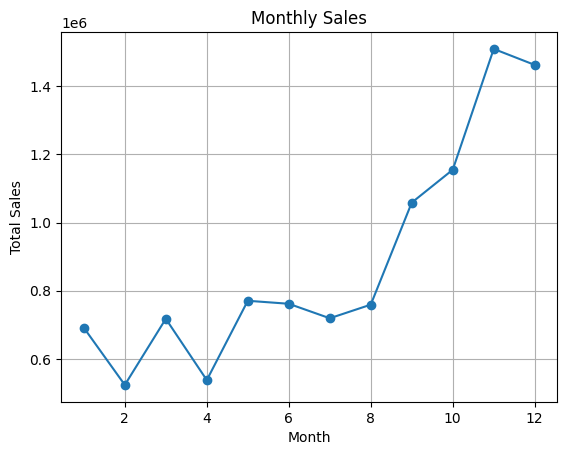

In [24]:
monthly_sales.plot(kind="line",title="Monthly Sales",marker="o")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

###Insights:
* Total sales starting using up in Augest having a peak in November.this is likely to the holiday season at the end of the year

### top 5 countries

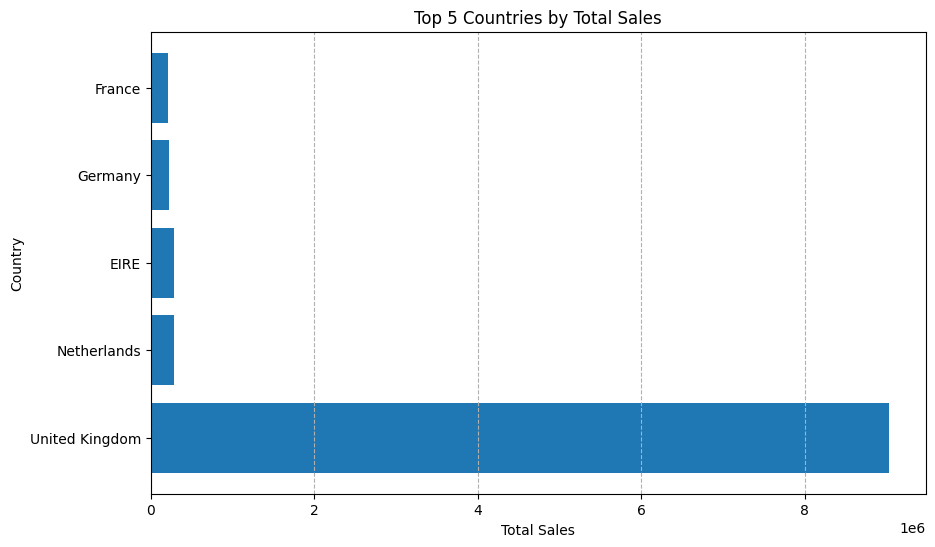

In [25]:
# prompt: plot horizental bar plot for the top 5 countries

import matplotlib.pyplot as plt
top_5_countries = df4.groupby('Country')['TotalSales'].sum().nlargest(5)
plt.figure(figsize=(10, 6))
plt.barh(top_5_countries.index, top_5_countries.values)
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Total Sales')
plt.grid(axis='x', linestyle='--')
plt.show()


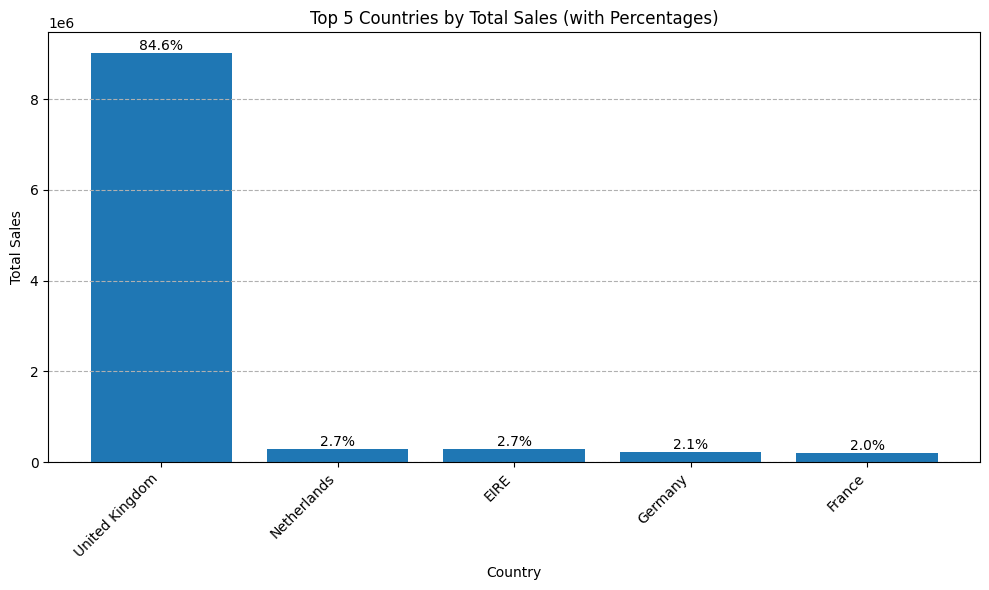

In [26]:
# prompt: show the above chart for top 5 countries also show percentage on bars

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

# ... (Your existing code for data loading and preprocessing)

# Calculate total sales per country
total_sales_by_country = df4.groupby('Country')['TotalSales'].sum()

# Get the top 5 countries
top_5_countries = total_sales_by_country.nlargest(5)

# Calculate percentages for the top 5 countries
percentages_top_5 = (top_5_countries / total_sales_by_country.sum()) * 100

# Create the bar plot with percentages
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_countries.index, top_5_countries.values)

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages_top_5):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Top 5 Countries by Total Sales (with Percentages)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, IntSlider
from IPython.display import display

# Calculate total sales per product
product_sales = df4.groupby('StockCode')['TotalSales'].sum()
total_sales = product_sales.sum()

def plot_top_products(n=5):
    """
    Plots the top N products by sales using seaborn, including percentages.

    Args:
        n (int, optional): The number of top products to display. Defaults to 5.
    """
    top_n_products = product_sales.nlargest(n)
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=top_n_products.values, y=top_n_products.index, palette="viridis")
    plt.xlabel("Total Sales")
    plt.ylabel("StockCode")
    plt.title(f"Top {n} Products by Sales")
    plt.grid(axis='x')

    # Calculate and display percentages on the bars
    for bar in ax.patches:
      width = bar.get_width()
      percentage = (width / total_sales) * 100
      x = bar.get_x() + width
      y = bar.get_y() + bar.get_height() / 2
      ax.text(x, y, f'{percentage:.1f}%', ha='left', va='center')

    plt.show()


# Create an interactive slider to control the number of products to display
slider = IntSlider(min=1, max=20, step=1, value=5, description="Number of Products")
interact(plot_top_products, n=slider)

interactive(children=(IntSlider(value=5, description='Number of Products', max=20, min=1), Output()), _dom_cla…

<function __main__.plot_top_products(n=5)>

###4 RFM Analysis

In [39]:
current_date=df4["InvoiceDate"].max() +pd.Timedelta(days=1)
current_date

Timestamp('2011-12-10 12:50:00')

In [41]:
rfm=df4.groupby("CustomerID").agg({
    "InvoiceDate":lambda x: (current_date-x.max()).days,
    "InvoiceNo":"count",
    "TotalSales":"sum"
})
rfm.columns=["Recency","Frequency","Monetary"]
rfm.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [45]:
 # Segment Customers based on rfm
rfm["R_segment"] =pd.qcut(rfm["Recency"],4,labels=[4,3,2,1])
rfm["F_segment"] =pd.qcut(rfm["Frequency"],4,labels=[1,2,3,4])
rfm["M_segment"] =pd.qcut(rfm["Monetary"],4,labels=[1,2,3,4])
rfm["RFM_Score"]=rfm[["R_segment","F_segment","M_segment"]].sum(axis=1) # Corrected line
rfm

,Recency,Frequency,Monetary,R_segment,F_segment,M_segment,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,6
12347.0,2,182,4310.00,4,4,4,12
12348.0,75,31,1797.24,2,2,4,8
12349.0,19,73,1757.55,3,3,4,10
12350.0,310,17,334.40,1,1,2,4
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,3
18281.0,181,7,80.82,1,1,1,3
18282.0,8,12,178.05,4,1,1,6


In [46]:
rfm.sort_values("RFM_Score",ascending=False)

,Recency,Frequency,Monetary,R_segment,F_segment,M_segment,RFM_Score
CustomerID,,,,,,,
18102.0,1,431,259657.30,4,4,4,12
14367.0,8,524,9261.52,4,4,4,12
17625.0,18,315,2047.00,4,4,4,12
15484.0,1,188,3594.31,4,4,4,12
14395.0,2,350,3507.71,4,4,4,12
...,...,...,...,...,...,...,...
13133.0,274,7,109.80,1,1,1,3
15578.0,162,13,127.10,1,1,1,3
13144.0,333,3,110.95,1,1,1,3


### 5 Customer Churn Analysis

In [47]:
df4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [48]:
# create a basket matrix for association rule mining
customer_last_purchase = df4.groupby('CustomerID')[ 'InvoiceDate'].max()
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [49]:
customer_last_purchase=(current_date-customer_last_purchase).dt.days
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


In [50]:
# Define churn threshold eg 90 days without purchase
churn_threshold=90
churned_customers=customer_last_purchase[customer_last_purchase>churn_threshold]
churned_customers.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214


Number of Churned customers:  1449


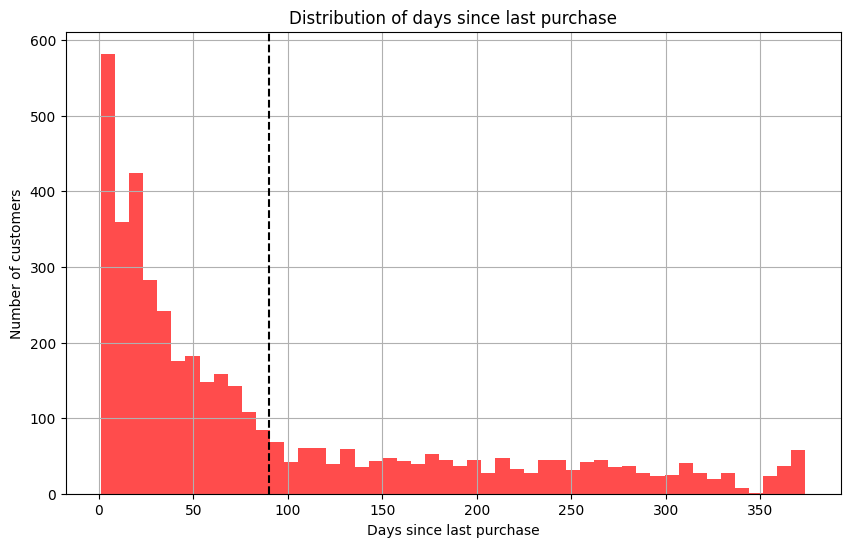

In [51]:
print("Number of Churned customers: ",len(churned_customers))
plt.figure(figsize=(10,6))
plt.hist(customer_last_purchase,bins=50,color="red",alpha=0.7)
plt.axvline(churn_threshold,color="black",linestyle="--")
plt.xlabel("Days since last purchase")
plt.ylabel("Number of customers")
plt.title("Distribution of days since last purchase")
plt.grid(True)
plt.show()